In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
# from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier
import sklearn
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy
import requests
import pprint
import xgboost
import scipy
import warnings
import re
from datetime import datetime
from scipy import stats
from urllib import parse
from bs4 import BeautifulSoup

# ÏßÄÏàò ÌòïÌÉúÏùò Ïã§ÏàòÎ•º ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÍπåÏßÄ ÌëúÍ∏∞
pd.options.display.float_format = "{:.3f}".format

# Í≥µÏú† Ìè¥Îçî Í≤ΩÎ°ú
dirShare = ".."

# Í≤ΩÍ≥† Ï∂úÎ†• Î¨¥Ïãú
warnings.filterwarnings("ignore")

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏
print("pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + pd.__version__)
print("scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + sklearn.__version__)
print("scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : "+ scipy.__version__)
print("statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + statsmodels.__version__)
print("xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + xgboost.__version__)

pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : 2.0.3
scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.3.0
scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.11.1
statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : 0.14.0
xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.7.6


# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í≥† Ï†ÑÏ≤òÎ¶¨

## Í∏∞Î≥∏Ï†ÑÏ≤òÎ¶¨

In [3]:
# train.csv Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(dirShare+"/data/train.csv")

# # df Ï†ïÎ≥¥ ÌôïÏù∏
# df.info()

# # df ÏÉÅÏúÑ 10Í∞ú Î∂àÎü¨Ïò§Í∏∞
# df.head(10)

In [4]:
df_t = pd.read_csv(dirShare+"/data/test.csv")

# df_t.info()
# df_t.head()

In [5]:
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
print("train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df.shape[0])
print("test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df_t.shape[0])

# len(df)Î•º Ïç®ÎèÑ ÎèôÏùº

train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  301
test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  127


In [6]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, train.csv
df.describe()

inst_id     sgg     openDate  bedCount         revenue1  \
count  301.000 301.000      301.000   296.000          293.000   
mean   219.056  81.040 20050125.801   145.709  12881747447.993   
std    121.235  50.970    88938.154   118.924  20435433475.616   
min      1.000   1.000 19780124.000     0.000            0.000   
25%    112.000  37.000 20011017.000    52.750   3252111902.000   
50%    230.000  75.000 20071126.000   136.500   5524218104.000   
75%    321.000 123.000 20111021.000   193.000  12748392940.000   
max    428.000 178.000 20170607.000   656.000 151000000000.000   

           salescost1             sga1         salary1           noi1  \
count         293.000          293.000         293.000        293.000   
mean   2014902794.594  10332439064.089  5654114566.904  269615124.573   
std    7460270656.568  14938862491.946  8083342530.256  802370115.514   
min             0.000            0.000           0.000          0.000   
25%             0.000   2758200772.000  1626052720.000    8217133.000   
50%     210410492.000   4684074465.000  2659892367.000   43637641.000   
75%     910527771.000  10778762060.000  6363400069.000  205033071.000   
max   98503322990.000 103000000000.000 64035593950.000 9144170639.000   

                noe1  ...  receivableL2           debt2  liquidLiabilities2  \
count        293.000  ...       293.000         293.000             293.000   
mean   511587022.570  ...    222670.000  8146026488.788      3860583593.406   
std   1060379255.452  ...   3811496.447 12557995349.365      6797242094.076   
min            0.000  ...         0.000           0.000               0.000   
25%     80133952.000  ...         0.000  1283220350.000       285574118.000   
50%    183196506.000  ...         0.000  3784552900.000      1454049945.000   
75%    420333030.000  ...         0.000  8465053127.000      4364713622.000   
max   8686379500.000  ...  65242310.000 85088583901.000     68468775764.000   

           shortLoan2  NCLiabilities2       longLoan2        netAsset2  \
count         293.000         293.000         293.000          293.000   
mean   1510050431.986  4471247363.877  2709978815.423   5273919018.089   
std    2953412250.368  7659580436.397  4564001070.999  10812593821.248   
min             0.000           0.000           0.000 -20147802018.000   
25%             0.000    25578782.000           0.000   1017572570.000   
50%      85425488.000  1969746813.000  1100000000.000   2894969804.000   
75%    1567966980.000  4905441439.000  3360000000.000   5370284792.000   
max   17593752360.000 51503883627.000 32561472110.000 125000000000.000   

             surplus2  employee1  employee2  
count         293.000    291.000    288.000  
mean    978627865.256    142.546    134.326  
std    4688797890.975    160.191    151.062  
min   -2781506722.000      0.000      0.000  
25%             0.000     53.500     53.750  
50%             0.000     80.000     79.000  
75%     101444685.000    181.500    170.000  
max   68527297093.000   1200.000   1200.000  

[8 rows x 54 columns]

In [7]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, test.csv
df_t.describe()

inst_id    OC     sgg     openDate  bedCount         revenue1  \
count  127.000 0.000 127.000      126.000   119.000          125.000   
mean   205.906   NaN  95.858 20050851.333   172.790  18244463620.632   
std    131.802   NaN  52.684    87958.149   126.024  31335295156.854   
min      2.000   NaN   6.000 19760409.000     0.000            0.000   
25%     89.000   NaN  51.000 20000826.000    94.000   3235888530.000   
50%    199.000   NaN  95.000 20071066.000   156.000   6637115540.000   
75%    328.000   NaN 144.500 20117895.500   213.000  17040391156.000   
max    431.000   NaN 177.000 20170531.000   771.000 181000000000.000   

            salescost1             sga1         salary1           noi1  ...  \
count          125.000          125.000         125.000        125.000  ...   
mean    3973320516.568  13404099537.944  7415083961.448  517551263.832  ...   
std    14199483023.803  20544811391.822 12100434017.387 1193138608.474  ...   
min              0.000            0.000           0.000          0.000  ...   
25%              0.000   3083860292.000  1666742310.000   16410940.000  ...   
50%      189692304.000   5716501623.000  3263054070.000   53191709.000  ...   
75%     1192329214.000  14452425786.000  7198103374.000  371459225.000  ...   
max   116000000000.000 127000000000.000 82395611833.000 7302719335.000  ...   

             tanAsset2    OnonCAsset2  receivableL2            debt2  \
count          125.000        125.000       125.000          125.000   
mean   13362088426.024  351383068.584     19731.144  11898512213.344   
std    20854039250.721  979109688.084    220600.896  19711820111.028   
min              0.000          0.000         0.000            0.000   
25%     2807762809.000          0.000         0.000   1679896491.000   
50%     5450482767.000   33173766.000         0.000   4494217146.000   
75%    11871143997.000  204899800.000         0.000  14120305387.000   
max   113000000000.000 7112779552.000   2466393.000 131000000000.000   

       liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
count             125.000         125.000         125.000         125.000   
mean       5633432084.136  2181713388.144  6495025895.904  4482682424.408   
std        9662047510.141  4952448637.736 12036733189.767  7517020054.736   
min                 0.000           0.000           0.000           0.000   
25%         391415567.000           0.000   132136760.000           0.000   
50%        1554505639.000   300000000.000  2030000000.000  1750000000.000   
75%        6586241453.000  2650000000.000  5700000000.000  4857047850.000   
max       52414267533.000 37143344381.000 78556538604.000 36202877976.000   

            netAsset2        surplus2  
count         125.000         125.000  
mean   6116178748.752  1648473877.648  
std    9813461143.417  4779443752.861  
min   -2955957091.000 -8600000000.000  
25%     949265633.000           0.000  
50%    2427138957.000           0.000  
75%    5881964991.000   693516549.000  
max   49244922328.000 25617866194.000  

[8 rows x 53 columns]

In [8]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, train.csv
df.shape[0] - df.count()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [9]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, test.csv
df_t.shape[0] - df_t.count()

inst_id                 0
OC                    127
sido                    0
sgg                     0
openDate                1
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

In [10]:
# employee Ïª¨ÎüºÏù¥ object ÌÉÄÏûÖÏù¥Í≥†, Ïà´ÏûêÏóê ','Ïù¥ Ìè¨Ìï®Îèº ÏûàÏñ¥ Ï†ïÍ∑ú ÌëúÌòÑÏãùÏúºÎ°ú ÏóÜÏï∞
for i in range(2) : 
    df_t["employee"+str(i+1)] = df_t["employee"+str(i+1)].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   employee1  127 non-null    object
 1   employee2  127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [11]:
# Ïã§Ïàò ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
df_t["employee1"].replace("", np.NaN, inplace=True)
df_t["employee2"].replace("", np.NaN, inplace=True)
df_t[["employee1", "employee2"]] = df_t[["employee1", "employee2"]].astype("float64")
df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   employee1  119 non-null    float64
 1   employee2  112 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB


In [12]:
df_t[["employee1", "employee2"]].head()

employee1  employee2
0    693.000    693.000
1    379.000    371.000
2        NaN        NaN
3    760.000    760.000
4    437.000    385.000

In [13]:
# trainÍ≥º testÎ•º ÏùºÏãúÏ†ÅÏúºÎ°ú Ìï©Ïπ®
df_merge = pd.concat(objs=[df,df_t], axis=0)
print("Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò : ",len(df_merge))
df_merge.head()

Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò :  428


inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1  open  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3  open  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4  open   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7  open    incheon  141 20000814.000   353.000  general_hospital   
4        9  open  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000         same  
1             NaN            NaN    801.000    813.000         same  
2           0.000          0.000    234.000      1.000         same  
3 12954271998.000 7740829037.000    663.000    663.000         same  
4     5561941.000 9025549604.000    206.000    197.000         same  

[5 rows x 58 columns]

In [14]:
# ÏïÑÏßÅ Ïö¥ÏòÅ Ï§ëÏù∏ Î≥ëÏõêÏùÑ 1Î°ú Î≥ÄÌôò
df_merge.replace({"open":1},inplace=True)
# ÌèêÏóÖÌïú Î≥ëÏõêÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò
df_merge.replace({" close":0}, inplace=True)
# unique() Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ "OC" Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏
# df["OC"].unique()
df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000         same  
1             NaN            NaN    801.000    813.000         same  
2           0.000          0.000    234.000      1.000         same  
3 12954271998.000 7740829037.000    663.000    663.000         same  
4     5561941.000 9025549604.000    206.000    197.000         same  

[5 rows x 58 columns]

In [15]:
# Ïò§ÎÑà Î≥ÄÌôò Ïó¨Î∂Ä
df_merge["ownerChange"].replace({"same":0},inplace=True)
df_merge["ownerChange"].replace({"change":1},inplace=True)
# df["ownerChange"].unique()
df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 58 columns]

In [16]:
df_merge["instkind"].unique()

array(['nursing_hospital', 'general_hospital', 'hospital',
       'traditional_clinic', 'clinic', 'traditional_hospital',
       'dental_clinic', nan], dtype=object)

In [17]:
# ÏòÅÏóÖÏù¥Ïùµ Ïª¨Îüº Ï∂îÍ∞Ä(Îß§Ï∂úÏï° - Îß§Ï∂úÏõêÍ∞Ä - ÌåêÎß§ Í¥ÄÎ¶¨ÎπÑ - Í∏âÏó¨)
# revenue - salescost - sga - salary

for i in range(2) : 
    df_merge.insert(loc=(24*(i)+11), column="busiProfit"+str(i+1), value=(df_merge["revenue"+str(i+1)]-df_merge["salescost"+str(i+1)]-df_merge["sga"+str(i+1)]-df_merge["salary"+str(i+1)]))

df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 60 columns]

In [18]:
# Î≥ëÏõê Ï¢ÖÎ•ò Î≥Ñ Î≥ëÏÉÅ ÏàòÏùò Ï∞®Ïù¥
df_bed = df_merge.groupby("instkind",axis=0)["bedCount"].count()
df_bed

instkind
clinic                   22
dental_clinic             1
general_hospital         56
hospital                120
nursing_hospital        204
traditional_clinic        5
traditional_hospital      6
Name: bedCount, dtype: int64

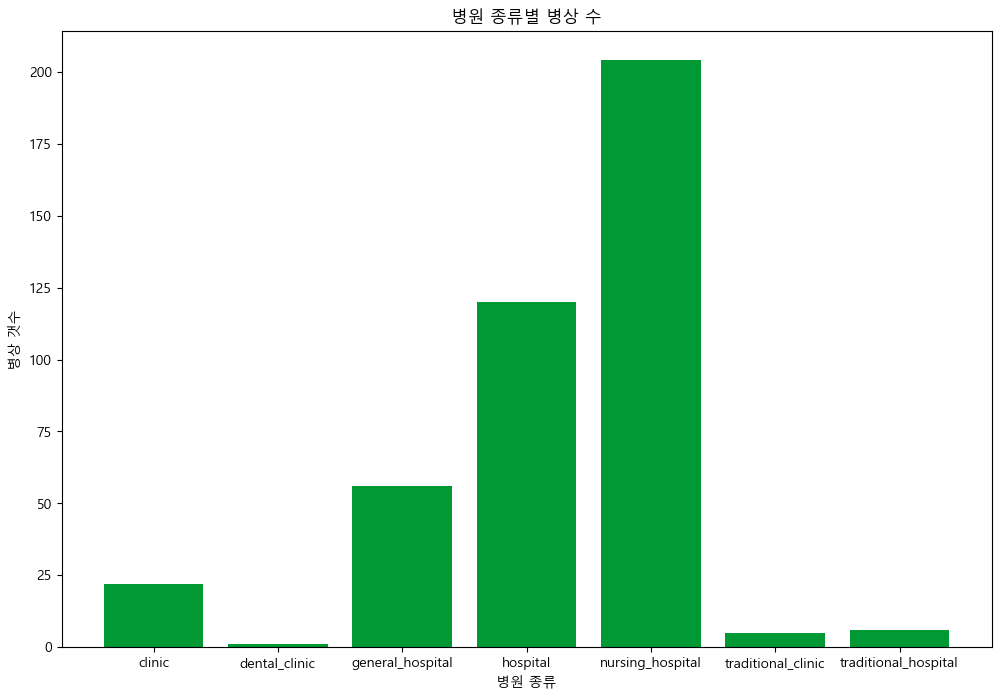

In [19]:
# Î≥ëÏõêÏùò Î≥ëÏÉÅ ÏàòÍ∞Ä ÎßéÏúºÎ©¥ Í∑∏ÎßåÌÅº ÌôòÏûê ÏàòÏö© ÏàòÍ∞Ä ÎßéÏúºÎãà Î≥ëÏõê ÏÑúÎπÑÏä§Í∞Ä Îçî Ï¢ãÏïÑÏßÄÎäî Í≤ÉÏù¥ ÏïÑÎãêÍπå?

plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,8))
    
plt.bar(x=df_bed.index, height=df_bed, color="#009933")
plt.title("Î≥ëÏõê Ï¢ÖÎ•òÎ≥Ñ Î≥ëÏÉÅ Ïàò")
plt.xlabel("Î≥ëÏõê Ï¢ÖÎ•ò")
plt.ylabel("Î≥ëÏÉÅ Í∞ØÏàò")
plt.show()

In [20]:
# Í∞úÏóÖÌïú ÎÇ†ÏßúÎäî Î≥ÄÏàòÎ°úÏÑú ÏùòÎØ∏Í∞Ä ÏóÜÏùå. Î™®Îç∏ÏùÄ ÎÇ†ÏßúÎ•º Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê
# Í∞úÏóÖ ÎÇ†ÏßúÏôÄ ÌèêÏóÖ ÎÇ†ÏßúÏùò Ï∞®Ïù¥Î°ú Î≥ÄÏàòÎ•º Ï°∞Ï†ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùå

date_of_2018 = "2018-01-01"

# Î¨∏Ïûê ÌÉÄÏûÖÏùÑ date ÌÉÄÏûÖÏúºÎ°ú

# df["openDate"] = df["openDate"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d")) # ValueError: unconverted data remains: .0
df_merge["openDate"] = pd.to_datetime(df_merge["openDate"], format="%Y%m%d")

# ÎÇ†Ïßú Ï∞®Ïù¥Î•º ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÏÉùÏÑ±, Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï§ëÍ∞ÑÏóê ÏÇΩÏûÖ
df_merge.insert(2, "dif_date", datetime.strptime(date_of_2018,"%Y-%m-%d")-df_merge["openDate"])
df_merge["dif_date"] = df_merge["dif_date"].dt.days

df_merge.drop(labels="openDate", axis=1, inplace=True)

df_merge["dif_date"].tail()
df_merge.head()

inst_id    OC  dif_date       sido  sgg  bedCount          instkind  \
0        1 1.000  3657.000  choongnam   73   175.000  nursing_hospital   
1        3 1.000  7580.000  gyeongnam   32   410.000  general_hospital   
2        4 1.000   369.000   gyeonggi   89   468.000  nursing_hospital   
3        7 1.000  6349.000    incheon  141   353.000  general_hospital   
4        9 1.000  4505.000  gyeongnam   32   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 60 columns]

In [21]:
# Î≥ëÏõêÏùò Ï¢ÖÎ•òÎ•º, get_dummiesÎ•º Ïù¥Ïö©Ìï¥ one-hot-encoding
df_m = pd.get_dummies(df_merge, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
df_m.head()

inst_id    OC  dif_date       sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000  choongnam   73   175.000  4217530010.000   
1        3 1.000  7580.000  gyeongnam   32   410.000             NaN   
2        4 1.000   369.000   gyeonggi   89   468.000  1004521989.000   
3        7 1.000  6349.000    incheon  141   353.000 72507342181.000   
4        9 1.000  4505.000  gyeongnam   32   196.000 49043538016.000   

     salescost1            sga1         salary1  ...  employee1  employee2  \
0         0.000  3961134739.000  2033835290.000  ...     62.000     64.000   
1           NaN             NaN             NaN  ...    801.000    813.000   
2 515483669.000   447219722.000   296402310.000  ...    234.000      1.000   
3         0.000 70677397660.000 31786048663.000  ...    663.000    663.000   
4         0.000 47656051197.000 24460782270.000  ...    206.000    197.000   

   ownerChange  instkind_clinic  instkind_dental_clinic  \
0        0.000                0                       0   
1        0.000                0                       0   
2        0.000                0                       0   
3        0.000                0                       0   
4        0.000                0                       0   

   instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
0                          0                  0                          1   
1                          1                  0                          0   
2                          0                  0                          1   
3                          1                  0                          0   
4                          1                  0                          0   

   instkind_traditional_clinic  instkind_traditional_hospital  
0                            0                              0  
1                            0                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0  

[5 rows x 66 columns]

In [22]:
df_m.reset_index(level=0, drop=True, inplace=True)

In [23]:
# ÏòÅÏñ¥Î°ú Îèº ÏûàÎäî 'ÏãúÎèÑ'Î•º ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò

df_m["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong', 'jeju'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú", 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ'],inplace=True)

print("df_newÏùò ÏãúÎèÑ : ",df_m["sido"].unique())
df_m.head()

df_newÏùò ÏãúÎèÑ :  ['Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Í≤ΩÏÉÅÎÇ®ÎèÑ' 'Í≤ΩÍ∏∞ÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú'
 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Í∞ïÏõêÎèÑ' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú' 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ']


inst_id    OC  dif_date   sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000   Ï∂©Ï≤≠ÎÇ®ÎèÑ   73   175.000  4217530010.000   
1        3 1.000  7580.000   Í≤ΩÏÉÅÎÇ®ÎèÑ   32   410.000             NaN   
2        4 1.000   369.000    Í≤ΩÍ∏∞ÎèÑ   89   468.000  1004521989.000   
3        7 1.000  6349.000  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  141   353.000 72507342181.000   
4        9 1.000  4505.000   Í≤ΩÏÉÅÎÇ®ÎèÑ   32   196.000 49043538016.000   

     salescost1            sga1         salary1  ...  employee1  employee2  \
0         0.000  3961134739.000  2033835290.000  ...     62.000     64.000   
1           NaN             NaN             NaN  ...    801.000    813.000   
2 515483669.000   447219722.000   296402310.000  ...    234.000      1.000   
3         0.000 70677397660.000 31786048663.000  ...    663.000    663.000   
4         0.000 47656051197.000 24460782270.000  ...    206.000    197.000   

   ownerChange  instkind_clinic  instkind_dental_clinic  \
0        0.000                0                       0   
1        0.000                0                       0   
2        0.000                0                       0   
3        0.000                0                       0   
4        0.000                0                       0   

   instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
0                          0                  0                          1   
1                          1                  0                          0   
2                          0                  0                          1   
3                          1                  0                          0   
4                          1                  0                          0   

   instkind_traditional_clinic  instkind_traditional_hospital  
0                            0                              0  
1                            0                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0  

[5 rows x 66 columns]

## Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [24]:
# 2017ÎÖÑ ÏßÄÏó≠Î≥Ñ Ïù∏Íµ¨Ïàò Îç∞Ïù¥ÌÑ∞
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3
pop = pd.read_csv(dirShare+"/data/ÌñâÏ†ïÍµ¨Ïó≠_ÏãúÍµ∞Íµ¨_Î≥Ñ__ÏÑ±Î≥Ñ_Ïù∏Íµ¨Ïàò_20230718231833.csv", header=1, encoding="cp949")
pop.info()
pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  18 non-null     object
 1   Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)    18 non-null     int64 
 2   ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
 3   Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 708.0+ bytes


ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)  ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)  Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)
0         Ï†ÑÍµ≠  51778544   25855919   25922625
1      ÏÑúÏö∏ÌäπÎ≥ÑÏãú   9857426    4830206    5027220
2      Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   3470653    1709508    1761145
3      ÎåÄÍµ¨Í¥ëÏó≠Ïãú   2475231    1227814    1247417
4      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   2948542    1479597    1468945

In [25]:
# Ïª¨ÎüºÎ™ÖÏùÑ ÏòÅÏñ¥Î°ú Î∞îÍæ∏Í∏∞
pop.rename(columns={"Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)":"tt_pop", "ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)":"male_pop", "Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)":"female_pop"}, inplace=True)
pop.columns

Index(['ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ', 'tt_pop', 'male_pop', 'female_pop'], dtype='object')

In [26]:
# dfÏôÄ pop(Ïù∏Íµ¨Ïàò) join
df_new = pd.merge(df_m, pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
df_new.head()

inst_id    OC  dif_date  sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   73   175.000  4217530010.000   
1       59 1.000  1385.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94   258.000  8546126935.000   
2      101 1.000 13026.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   37   341.000 52626386641.000   
3      134 1.000 10804.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   78    64.000  4402779495.000   
4      150 1.000  1589.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94   186.000  5237992090.000   

       salescost1            sga1         salary1  ...  \
0           0.000  3961134739.000  2033835290.000  ...   
1           0.000  6737509250.000  3830658980.000  ...   
2 19326736791.000 32214235859.000 20975361934.000  ...   
3   719458530.000  4131517858.000  2436024468.000  ...   
4           0.000  5060655115.000  2623322811.000  ...   

   instkind_dental_clinic  instkind_general_hospital  instkind_hospital  \
0                       0                          0                  0   
1                       0                          0                  0   
2                       0                          1                  0   
3                       0                          0                  1   
4                       0                          0                  0   

   instkind_nursing_hospital  instkind_traditional_clinic  \
0                          1                            0   
1                          1                            0   
2                          0                            0   
3                          0                            0   
4                          1                            0   

   instkind_traditional_hospital  ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ   tt_pop  male_pop  female_pop  
0                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
1                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
2                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
3                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
4                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  

[5 rows x 70 columns]

In [27]:
# ÏãúÎèÑÎ•º one-hot-encoding
df_new = pd.get_dummies(df_new, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)

In [28]:
# ÏßÄÏó≠ÏùÑ one-hot-encoding ÌñàÏúºÎØÄÎ°ú ÏãúÍµ∞Íµ¨ Ïª¨ÎüºÏùÄ Î¨¥ÏùòÎØ∏
df_new.drop(columns=["ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ","sgg"], axis=1, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       427 non-null    float64
 3   bedCount                       415 non-null    float64
 4   revenue1                       418 non-null    float64
 5   salescost1                     418 non-null    float64
 6   sga1                           418 non-null    float64
 7   salary1                        418 non-null    float64
 8   busiProfit1                    418 non-null    float64
 9   noi1                           418 non-null    float64
 10  noe1                           418 non-null    float64
 11  interest1                      418 non-null    float64
 12  ctax1                          418 non-null    flo

## kmeansÎ•º ÌÜµÌïú Î≥ëÏõê ÏÑ∏Í∑∏Î®ºÌä∏ Íµ∞Ïßë

In [29]:
def visualize_silhouette(cluster_lists, X_features): 

    """
    Ìï®Ïàò Ï∂úÏ≤ò : https://dev-ryuon.tistory.com/83
    """

    import matplotlib.cm as cm
    import math

    # ÏûÖÎ†•Í∞íÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î∞õÏïÑÏÑú, Í∞Å Í∞ØÏàòÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ï†ÅÏö©ÌïòÍ≥† Ïã§Î£®Ïó£ Í∞úÏàòÎ•º Íµ¨Ìï®
    n_cols = len(cluster_lists)

    # plt.subplots()ÏúºÎ°ú Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÎßåÌÅºÏùò sub figuresÎ•º Í∞ÄÏßÄÎäî axs ÏÉùÏÑ± 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Ï∞®Î°ÄÎ°ú iteration ÏàòÌñâÌïòÎ©¥ÏÑú Ïã§Î£®Ïó£ Í∞úÏàò ÏãúÍ∞ÅÌôî
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâÌïòÍ≥†, Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ÏôÄ Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Î£®Ïó£ Í∞í Í≥ÑÏÇ∞. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=100)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎ≥ÑÎ°ú fill_betweenx( )ÌòïÌÉúÏùò ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÌëúÌòÑ. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

<Axes: >

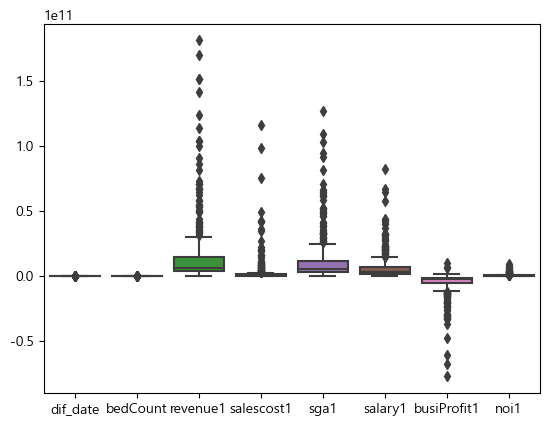

In [30]:
sns.boxplot(data=df_new.iloc[:, 2:10])

In [31]:
# NaN Í∞íÏù¥ ÏóÜÎäî Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í≥†, ÏßÄÏó≠ Îç∞Ïù¥ÌÑ∞ ÏóÜÏï†Í∏∞
df_kmeans = df_new.dropna(axis=1, how="any")
# df_kmeans = df_kmeans.iloc[:, :11]
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   inst_id                        428 non-null    int64
 1   instkind_clinic                428 non-null    int32
 2   instkind_dental_clinic         428 non-null    int32
 3   instkind_general_hospital      428 non-null    int32
 4   instkind_hospital              428 non-null    int32
 5   instkind_nursing_hospital      428 non-null    int32
 6   instkind_traditional_clinic    428 non-null    int32
 7   instkind_traditional_hospital  428 non-null    int32
 8   tt_pop                         428 non-null    int64
 9   male_pop                       428 non-null    int64
 10  female_pop                     428 non-null    int64
 11  sido_Í∞ïÏõêÎèÑ                       428 non-null    int32
 12  sido_Í≤ΩÍ∏∞ÎèÑ                       428 non-null    int32
 13  sido_Í≤Ω

In [32]:
scaler1 = MinMaxScaler()

df_mmsc = df_kmeans.drop(columns=["inst_id"])

df_mmsc.dropna(how="any", axis=1, inplace=True)

df_mmsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   instkind_clinic                428 non-null    int32
 1   instkind_dental_clinic         428 non-null    int32
 2   instkind_general_hospital      428 non-null    int32
 3   instkind_hospital              428 non-null    int32
 4   instkind_nursing_hospital      428 non-null    int32
 5   instkind_traditional_clinic    428 non-null    int32
 6   instkind_traditional_hospital  428 non-null    int32
 7   tt_pop                         428 non-null    int64
 8   male_pop                       428 non-null    int64
 9   female_pop                     428 non-null    int64
 10  sido_Í∞ïÏõêÎèÑ                       428 non-null    int32
 11  sido_Í≤ΩÍ∏∞ÎèÑ                       428 non-null    int32
 12  sido_Í≤ΩÏÉÅÎÇ®ÎèÑ                      428 non-null    int32
 13  

In [33]:
scalerX1 = scaler1.fit(df_mmsc)

X_mmsc1 = scaler1.transform(df_mmsc)

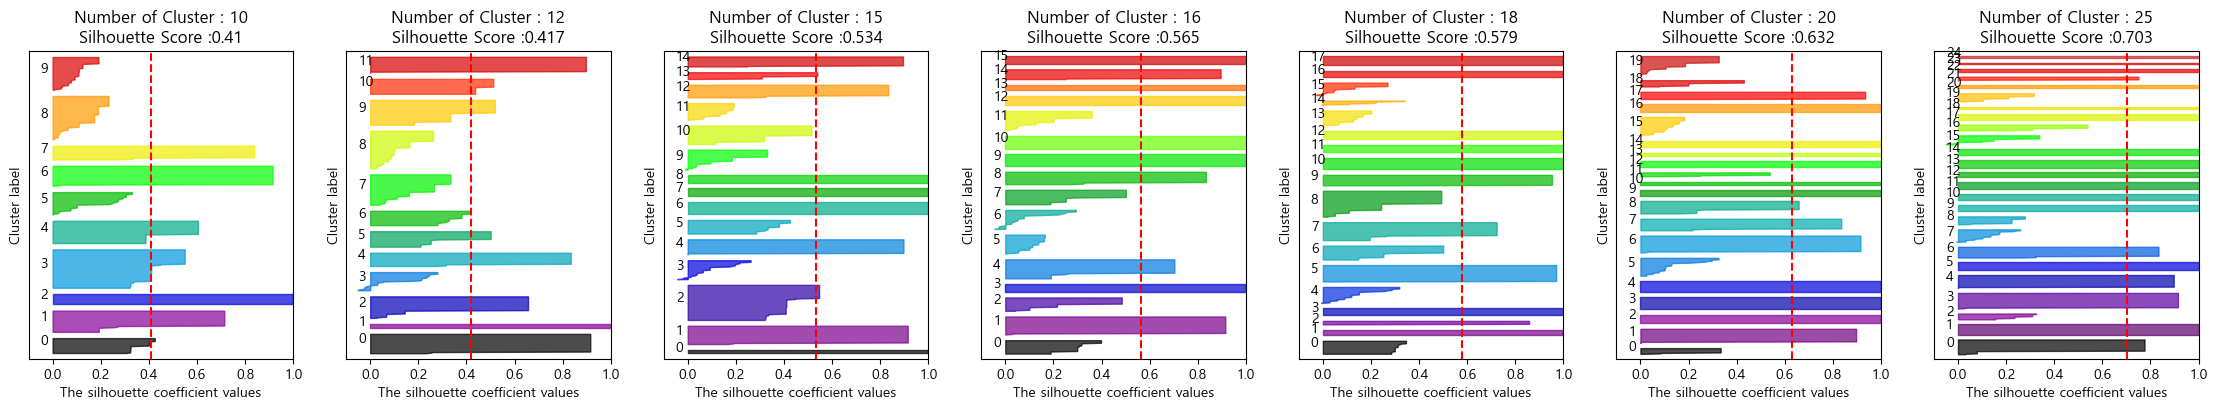

In [34]:
visualize_silhouette([10,12,15,16,18,20,25], X_mmsc1)
# 25Í∞úÍ∞Ä ÎêêÏùÑ Îïå Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞Ä 0.703ÏúºÎ°ú ÏµúÎåÄ

In [35]:
clst_kmeans = KMeans(n_clusters=25, random_state=100, max_iter=500)

model = clst_kmeans.fit(X_mmsc1)
clst_label = model.labels_

print(clst_label)

[ 6  6  7 19  6  6  6  6  6 19  6  6  6  6  6  6  6  6  6  6  6  6 19  6
  7  6  6  6  6  6  7  7  7  7  1  1 11  7 11 11  1  1  1 11  1  1  1 11
 11  1  1  1  7  1  1  1  1  1 11  1 11  1  1 11  1 11 11 11  1 11 11  1
  1 11  1 11  0 14 14 14  0  0  0  9  9 18  9  9  0  0  9 18  0  9  0  0
  0 18  0  0  0  0  9  0  0  9 14 14 18 14  9  0  9  0 18  0  0  0  9 14
 14 14  9  0  0 14 14  9  0 14  0  0  0 14  0  0  0 18  0  9  0  0  0  9
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  7  4  4  4  4  4  4  4  4  4
  4  4  7 22  4  4  4 22  4  4  4 22  4  4  4 22  7  7  7 22  4 22  4 22
  4  4  4  4 22  4  4  4  4 10 10 10 16 16 16 16 10 10 10 16 10 10 16 10
 10 10 10 16 16 10 16 16 10 16 10 16 16 16  8  8  8 20  8  8 20 20  8  8
  8 20  8  8 20  8  8 20  8 20  8  8  8 20  8  8  8  5  5  5 21  5  5  7
  5  5  5 21  5 21 21  5 21  5  7  7  7  5 21 21  5  5 21 21  5  5  5  5
 17 24 17 17 24 17 24 17 17 17 17 17 17 24  7 17 24 17 17 17 24  7  7 15
 19 15 19 19  7 15 15 15 19 19 15 15 15 19 15 15 15

In [36]:
df_kmeans["NumberOfCluster"] = pd.Series(clst_label)
df_kmeans.tail()

inst_id  instkind_clinic  instkind_dental_clinic  \
423      355                0                       0   
424      207                0                       0   
425        5                0                       0   
426      398                0                       0   
427      430                0                       0   

     instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
423                          0                  0                          1   
424                          0                  0                          1   
425                          0                  1                          0   
426                          0                  0                          1   
427                          0                  0                          0   

     instkind_traditional_clinic  instkind_traditional_hospital  tt_pop  \
423                            0                              0  280100   
424                            0                              0  280100   
425                            0                              0  657083   
426                            0                              0  657083   
427                            0                              0  657083   

     male_pop  ...  sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú  sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  \
423    139734  ...           0             1           0           0   
424    139734  ...           0             1           0           0   
425    330823  ...           0             0           0           0   
426    330823  ...           0             0           0           0   
427    330823  ...           0             0           0           0   

     sido_Ï†ÑÎùºÎÇ®ÎèÑ  sido_Ï†ÑÎùºÎ∂ÅÎèÑ  sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ  sido_Ï∂©Ï≤≠Î∂ÅÎèÑ  NumberOfCluster  
423          0          0             0          0          0               15  
424          0          0             0          0          0               15  
425          0          0             1          0          0               19  
426          0          0             1          0          0               15  
427          0          0             1          0          0               15  

[5 rows x 29 columns]

In [37]:
# Ïû¨Î¨¥ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îèº ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎÑòÎ≤Ñ ÏÇΩÏûÖ
df_join_clst = pd.merge(df_new, df_kmeans[["inst_id", "NumberOfCluster"]], how="left", left_on="inst_id", right_on="inst_id")
df_join_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       427 non-null    float64
 3   bedCount                       415 non-null    float64
 4   revenue1                       418 non-null    float64
 5   salescost1                     418 non-null    float64
 6   sga1                           418 non-null    float64
 7   salary1                        418 non-null    float64
 8   busiProfit1                    418 non-null    float64
 9   noi1                           418 non-null    float64
 10  noe1                           418 non-null    float64
 11  interest1                      418 non-null    float64
 12  ctax1                          418 non-null    flo

In [38]:
# Íµ∞ÏßëÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® ÌôïÏù∏

def sp_hist(DF=None, colClst=None, colhist=None, Range=None) :
    """
    Íµ∞ÏßëÎ≥Ñ ÌäπÏ†ï Ïª¨ÎüºÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº
    colhist : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÌëúÌòÑÌïòÍ≥†Ïûê ÌïòÎäî Ïª¨Îüº
    """
    
    fig, axs = plt.subplots(figsize=(16, 32), nrows=4, ncols=3)
    # axsÎäî numpy ndarray ÌòïÏãù

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Î∞è Íπ®Ïßê Î∞©ÏßÄ
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    for c in range(Range):
        dataframe = DF[DF[colClst]==c][colhist]
        # print("ÌòÑÏû¨ ÏàúÏÑú :",c)
        # print("Ìñâ :", c//3)
        # print("Ïó¥ :", c%3)
        axs[(c//3),(c % 3)].hist(dataframe, bins=20)
        axs[(c//3),(c % 3)].set_title('Number of Cluster : '+ str(c)+'\n' \
                            'Column Name :' + str(dataframe.name) )
        axs[(c//3),(c % 3)].set_xlabel("Í≥ÑÍ∏â")
        axs[(c//3),(c % 3)].set_ylabel("ÎèÑÏàò")

    plt.show()

    return

In [39]:
# Íµ∞ÏßëÎ≥Ñ boxplot ÌôïÏù∏
def sp_boxplot(DF=None, colClst=None, colbox=None, Range=None) :
    plt.figure(figsize=(28,20))
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # rectangular box plot
    DF_box = pd.DataFrame()

    for c in range(Range) : 
        dataframe = DF[DF[colClst]==c][colbox]
        dataframe.rename(str(c), inplace=True)
        DF_box = pd.concat([DF_box, dataframe], axis=1)

    sns.boxplot(
                data = DF_box,
                orient='v'
                ) 
    plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥Ñ boxplot")

    plt.show()
    return

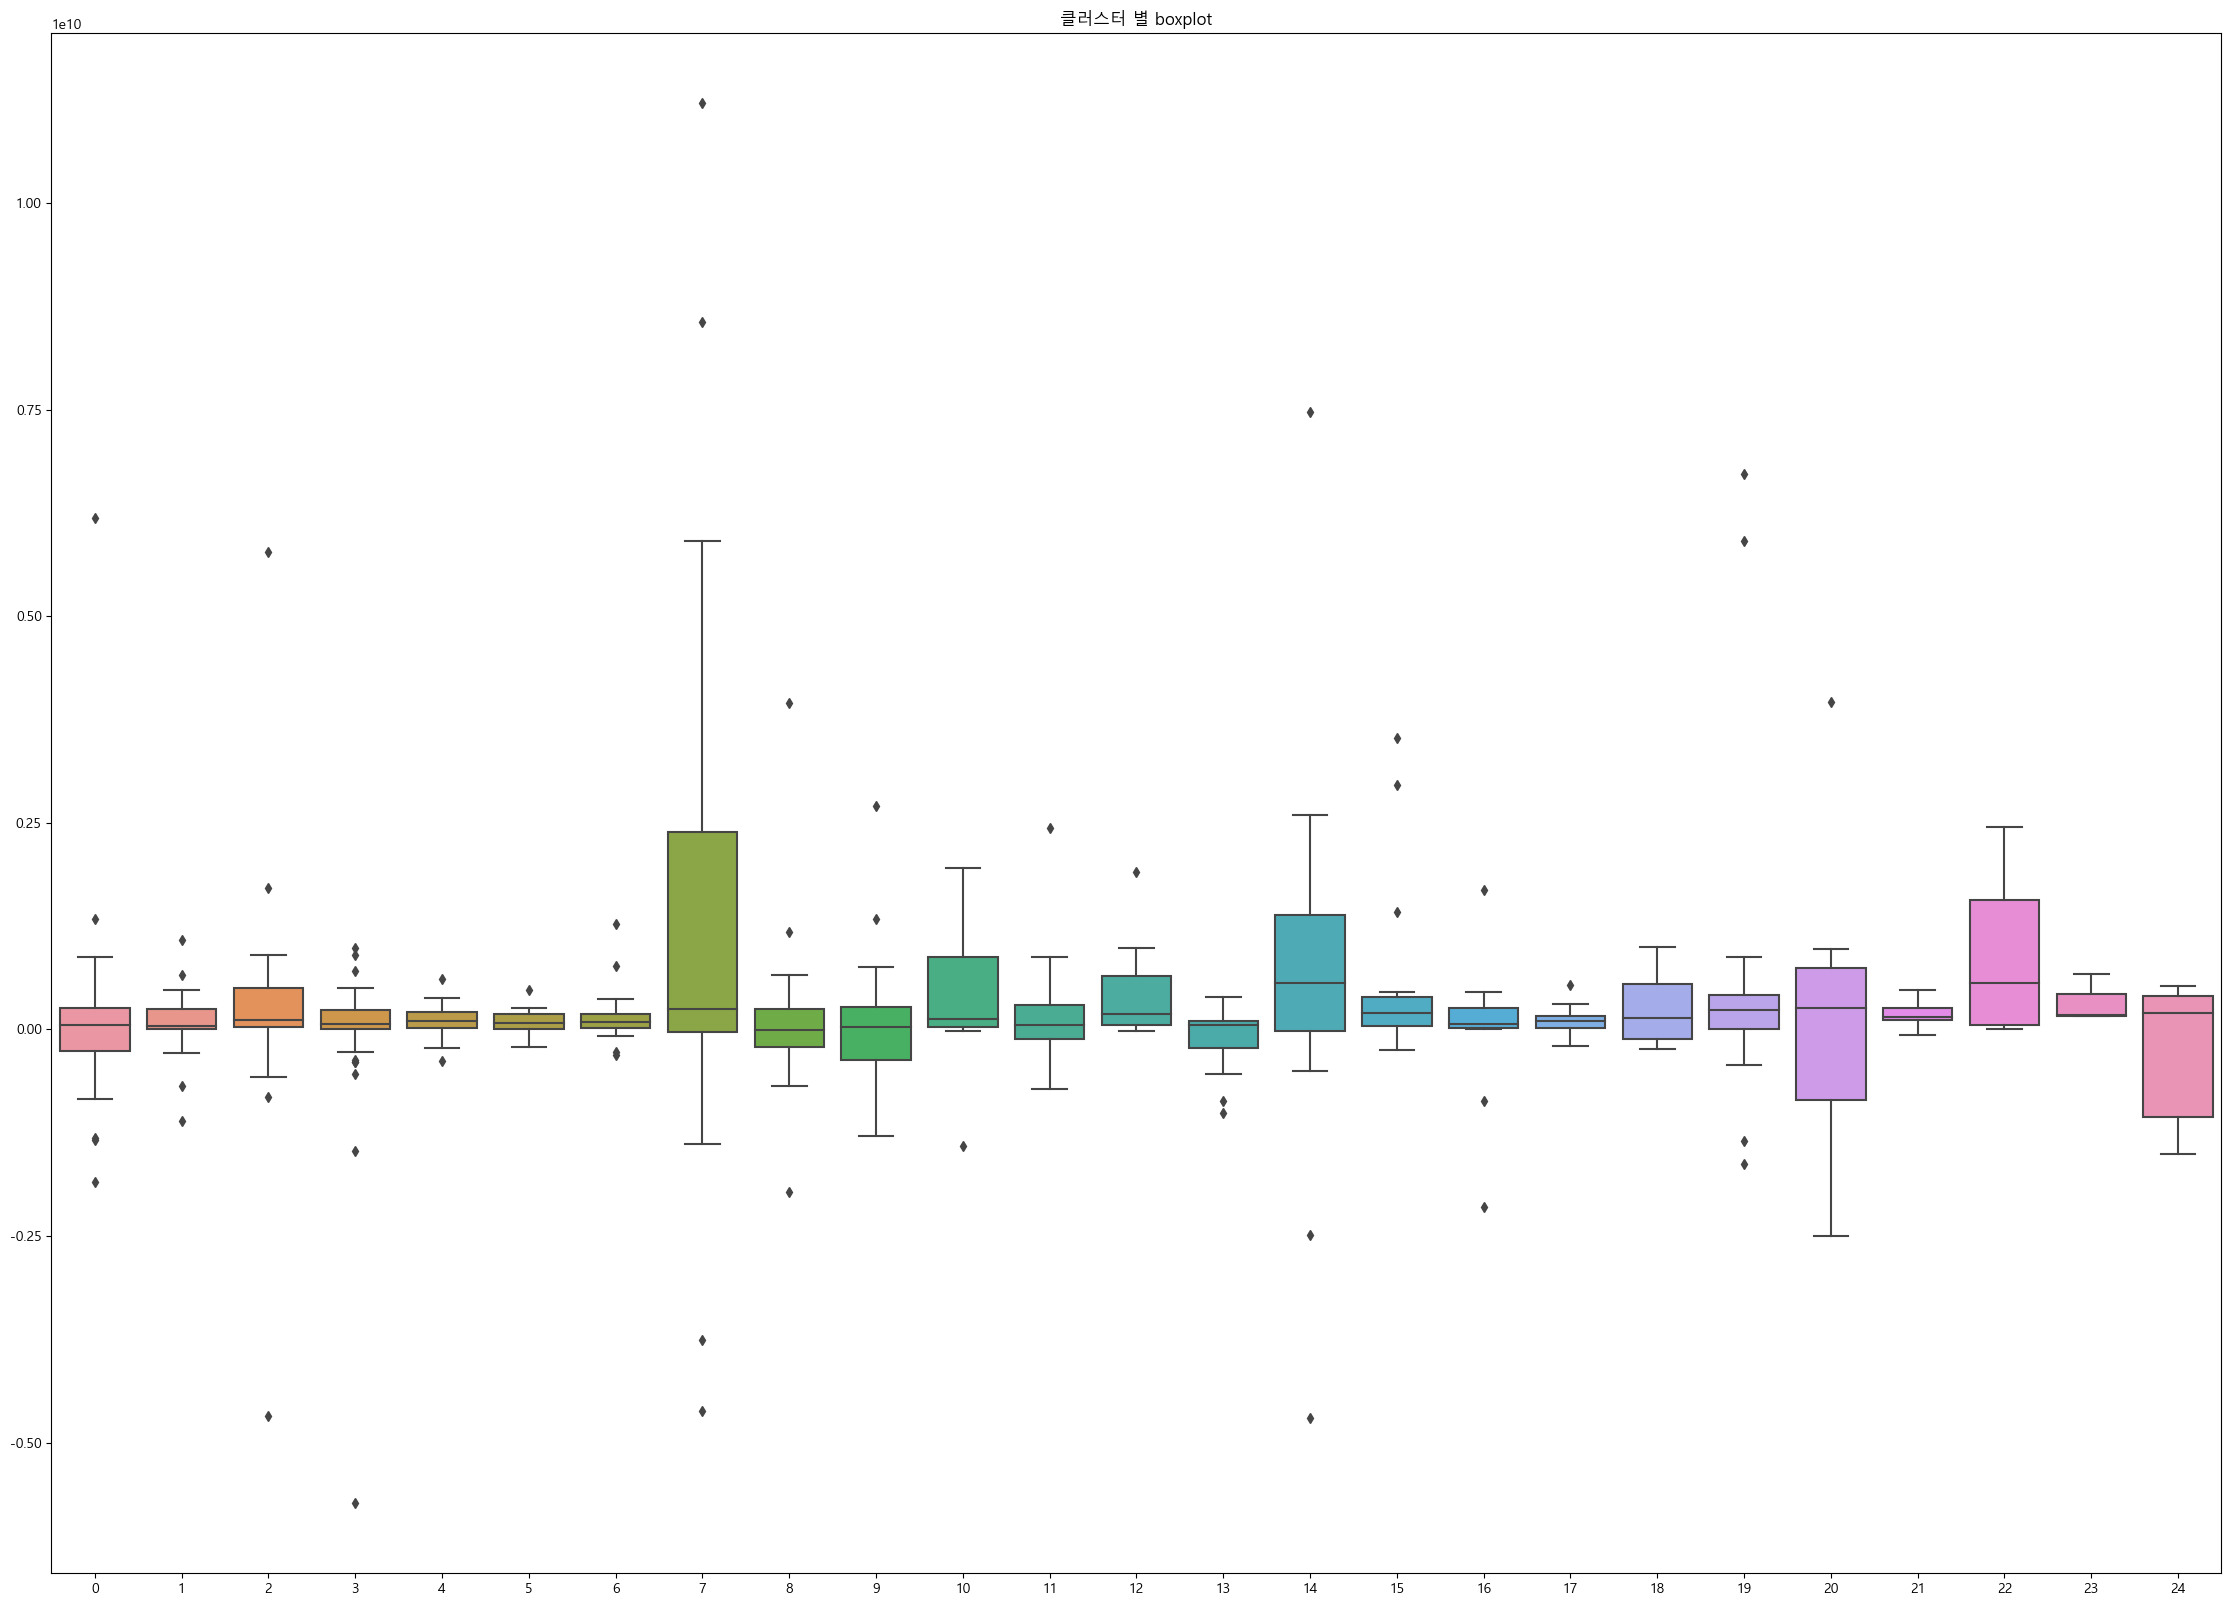

In [40]:
sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="profit1", Range=25)

In [41]:
# Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏõÄ

def fill_median(DF=None, colClst=None, colFill=None, numclst=None) :
    """
    Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Îç∞Ïù¥ÌÑ∞Ïóê, Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏùÑ Ï±ÑÏõå ÎÑ£Í≥†Ïûê Ìï®

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº(str)
    colFill : Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞Í≥†Ïûê ÌïòÎäî Ïª¨Îüº Î¶¨Ïä§Ìä∏(list)
    numclst : ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò(int)
    """
    for cl in range(numclst) :
        for L in colFill :
            median_value = DF.loc[DF[colClst] == cl, L].median()
            DF.loc[(DF[colClst] == cl) & DF[L].isnull(), L] = median_value

    return DF

In [42]:
df_join_clst = fill_median(DF=df_join_clst, colClst="NumberOfCluster", 
                           colFill=df_join_clst.columns[2:57], numclst=25)
df_join_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       428 non-null    float64
 3   bedCount                       428 non-null    float64
 4   revenue1                       428 non-null    float64
 5   salescost1                     428 non-null    float64
 6   sga1                           428 non-null    float64
 7   salary1                        428 non-null    float64
 8   busiProfit1                    428 non-null    float64
 9   noi1                           428 non-null    float64
 10  noe1                           428 non-null    float64
 11  interest1                      428 non-null    float64
 12  ctax1                          428 non-null    flo

## statsmodelsÎ•º ÏÇ¨Ïö©Ìïú vif Í≥ÑÏÇ∞

In [43]:
# Î≥ëÏõê Í∞ú/ÌèêÏóÖ Ï†ïÎ≥¥Ïùò Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑùÍ≥º Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
Models1 = sm.ols("OC ~ " + "+".join(df_join_clst.columns[2:84]), data=df_join_clst.iloc[:,1:84])
result1 = Models1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     OC   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1.901
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           0.000152
Time:                        11:14:18   Log-Likelihood:                 106.87
No. Observations:                 301   AIC:                            -59.75
Df Residuals:                     224   BIC:                             225.7
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [44]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò XÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò yÎ°ú Î∂ÑÎ¶¨
X = df_join_clst.iloc[:,2:84]
y = df_join_clst.iloc[:,1]

In [45]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í∞Ñ Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏, vif ÏßÄÏàò 10 Ïù¥ÏÉÅÏù¥Î©¥ Î≥ÄÏàò Ï†úÍ±∞ Í≥†Î†§
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

VIF Factor                features
0                 1.087            receivableL1
1                 1.315             ownerChange
2                 1.612  instkind_dental_clinic
3                 1.897                dif_date
4                 2.623                bedCount
..                  ...                     ...
77 9007199254740992.000              sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú
78 9007199254740992.000               sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ
79                  inf              female_pop
80                  inf                  tt_pop
81                  inf                male_pop

[82 rows x 2 columns]

In [46]:
# vif ÏßÄÏàòÍ∞Ä 10ÎØ∏ÎßåÏù∏ Ïª¨ÎüºÎ™Ö
vif[vif["VIF Factor"]<10.0]["features"]

0                     receivableL1
1                      ownerChange
2           instkind_dental_clinic
3                         dif_date
4                         bedCount
5                     receivableL2
6      instkind_traditional_clinic
7    instkind_traditional_hospital
8                     receivableS2
9                     receivableS1
Name: features, dtype: object

In [47]:
feat_vif = vif[vif["VIF Factor"]<10.0]["features"]

fvList = [feat_vif[f] for f in range(len(feat_vif))]

In [48]:
fvList.insert(0, "OC")

In [49]:
df_drop_vif = df_join_clst[fvList]
df_drop_vif.head()

OC  receivableL1  ownerChange  instkind_dental_clinic  dif_date  \
0 1.000         0.000        0.000                       0  3657.000   
1 1.000         0.000        0.000                       0  1385.000   
2 1.000         0.000        0.000                       0 13026.000   
3 1.000         0.000        0.000                       0 10804.000   
4 1.000         0.000        0.000                       0  1589.000   

   bedCount  receivableL2  instkind_traditional_clinic  \
0   175.000         0.000                            0   
1   258.000         0.000                            0   
2   341.000         0.000                            0   
3    64.000         0.000                            0   
4   186.000         0.000                            0   

   instkind_traditional_hospital   receivableS2   receivableS1  
0                              0  523702570.000  470055740.000  
1                              0 1898913934.000 1843823564.000  
2                              0  125878556.000  123296146.000  
3                              0  377644445.000  603445494.000  
4                              0   43760000.000   43775710.000

In [50]:
df_drop_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OC                             301 non-null    float64
 1   receivableL1                   428 non-null    float64
 2   ownerChange                    428 non-null    float64
 3   instkind_dental_clinic         428 non-null    int32  
 4   dif_date                       428 non-null    float64
 5   bedCount                       428 non-null    float64
 6   receivableL2                   428 non-null    float64
 7   instkind_traditional_clinic    428 non-null    int32  
 8   instkind_traditional_hospital  428 non-null    int32  
 9   receivableS2                   428 non-null    float64
 10  receivableS1                   428 non-null    float64
dtypes: float64(8), int32(3)
memory usage: 31.9 KB


In [51]:
Models2 = sm.ols("OC ~ " + "+".join(df_drop_vif.columns[1:]), data=df_drop_vif)
result2 = Models2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                     OC   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     4.359
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.38e-05
Time:                        11:14:19   Log-Likelihood:                 50.986
No. Observations:                 301   AIC:                            -81.97
Df Residuals:                     291   BIC:                            -44.90
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [52]:
"""
vif ÏßÄÏàòÍ∞Ä 10 Ïù¥ÏÉÅÏù¥ÎùºÍ≥† Î¨¥Ï°∞Í±¥ Ï†úÍ±∞ÌïòÎ©¥ Ïïà Îê®!
"""

'\nvif ÏßÄÏàòÍ∞Ä 10 Ïù¥ÏÉÅÏù¥ÎùºÍ≥† Î¨¥Ï°∞Í±¥ Ï†úÍ±∞ÌïòÎ©¥ Ïïà Îê®!\n'

## SVDÎ•º ÏúÑÌïú ÏûëÏóÖ

Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò ÏàòÏùò 3Î∞∞ Ïù¥ÏÉÅÏùÄ ÎèºÏïº Ìï®.
ÎèÖÎ¶ΩÎ≥ÄÏàòÎ°ú ÏûëÏö©ÌïòÎäî Ïª¨Îüº ÏàòÍ∞Ä 57Í∞úÏù¥ÎØÄÎ°ú Îã§Ï§ë Í≥µÏÑ†ÏÑ±Í≥º Í≥ºÏ†ÅÌï©, Ï∞®ÏõêÏùò Ï†ÄÏ£ºÏùò ÏòÅÌñ•Ïù¥ ÏòàÏÉÅÎêòÎØÄÎ°ú
Ï∞®Ïõê Ï∂ïÏÜå ÌïÑÏöî  
  
Ïó¨Îü¨ ÌäπÏÑ±Îì§Î°ú Íµ¨ÏÑ±Îêú Îã§Ï∞®ÏõêÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏùò Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌï¥ ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏùò Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏÉùÏÑ±  

In [53]:
df_model_origin = df_join_clst.iloc[:,:57]
df_model_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             428 non-null    int64  
 1   OC                  301 non-null    float64
 2   dif_date            428 non-null    float64
 3   bedCount            428 non-null    float64
 4   revenue1            428 non-null    float64
 5   salescost1          428 non-null    float64
 6   sga1                428 non-null    float64
 7   salary1             428 non-null    float64
 8   busiProfit1         428 non-null    float64
 9   noi1                428 non-null    float64
 10  noe1                428 non-null    float64
 11  interest1           428 non-null    float64
 12  ctax1               428 non-null    float64
 13  profit1             428 non-null    float64
 14  liquidAsset1        428 non-null    float64
 15  quickAsset1         428 non-null    float64
 16  receivab

In [54]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò Ïª¨Îüº ÏÉ§ÌîºÎ°ú ÏúåÌÅ¨ Í≤ÄÏ†ïÏúºÎ°ú Ï†ïÍ∑úÏÑ± ÌôïÏù∏
# H0 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§.
# H1 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

cnt = 0
for i in range(df_model_origin.shape[1]) : 
    cnt += 1
    shapiro_tt = stats.shapiro(df_model_origin.iloc[:,i])
    print(cnt)
    if shapiro_tt[1] > 0.05 : 
        print("Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú")
        print("Ïª¨ÎüºÎ™Ö ",df_model_origin.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.")
    else : 
        print("Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú")
        print("Ïª¨ÎüºÎ™Ö ",df_model_origin.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

1
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  inst_id Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
2
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  OC Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
3
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  dif_date Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
4
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  bedCount Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
5
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  revenue1 Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
6
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  salescost1 Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ 

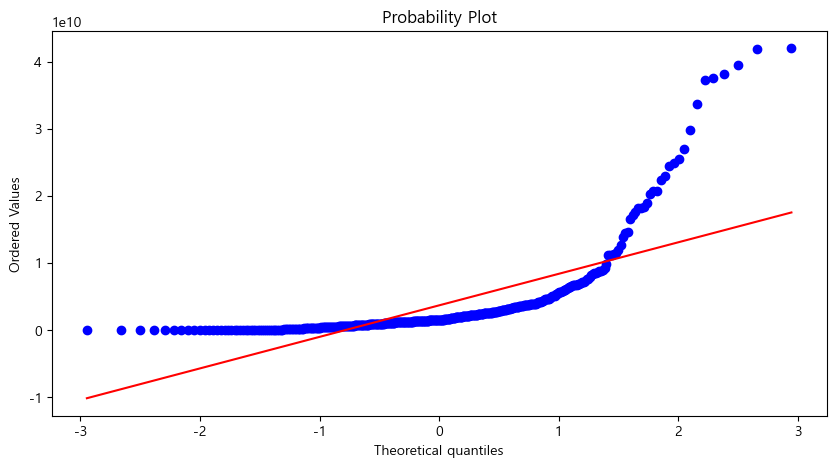

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))    # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
stats.probplot(df_model_origin.iloc[:,15], dist=stats.norm, plot=plt) #SampleÏùÄ Ïñ¥Îäê Ï†ïÎèÑ Ïñ¥Í∏ãÎÇ¨ÎäîÏßÄ ÎπÑÍµêÌï† Î∂ÑÌè¨,
                                                  #distÎäî Í∏∞Ï§ÄÏù¥ ÎêòÎäî Î∂ÑÌè¨, Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÏñ¥ÎèÑ ÎêúÎã§.
                                                  #plotÏùÄ Ï£ºÎ°ú matplotlib.plt Í∞ùÏ≤¥ ÏÇ¨Ïö©
plt.show()

SVDÎ•º ÌÜµÌï¥, AÎùºÎäî ÏûÑÏùòÏùò ÌñâÎ†¨ÏùÑ Ïó¨Îü¨Í∞úÏùò A ÌñâÎ†¨Í≥º ÎèôÏùºÌïú ÌÅ¨Í∏∞Î•º Í∞ñÎäî Ïó¨Îü¨Í∞úÏùò ÌñâÎ†¨Î°ú Î∂ÑÌï¥Ìï¥ÏÑú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÎäîÎç∞, Î∂ÑÌï¥Îêú Í∞Å ÌñâÎ†¨Ïùò ÏõêÏÜåÏùò Í∞íÏùò ÌÅ¨Í∏∞Îäî œÉÏùò Í∞íÏùò ÌÅ¨Í∏∞Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎêúÎã§.  
Îã§Ïãú ÎßêÌï¥, SVDÎ•º Ïù¥Ïö©Ìï¥ ÏûÑÏùòÏùò ÌñâÎ†¨ AÎ•º Ï†ïÎ≥¥ÎüâÏóê Îî∞Îùº Ïó¨Îü¨ layerÎ°ú Ï™ºÍ∞úÏÑú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§.  
Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Í∞Ä Ïä§ÏºÄÏùºÎßÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï§ëÏã¨Ïù¥ ÎèôÏùºÌï¥ÏßÄÎ©¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò SVDÏôÄ PCAÎäî ÎèôÏùºÌïú Î≥ÄÌôòÏùÑ ÏàòÌñâÌïòÎ©∞, Ìù¨ÏÜå ÌñâÎ†¨(Sparse Matrix)Ïóê ÎåÄÌïú Î≥ÄÌôòÎèÑ Í∞ÄÎä•

In [56]:
# test Îç∞Ïù¥ÌÑ∞Ïùò inst_idÍ∞Ä Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
df_dvd_test = pd.merge(left=df_model_origin, right=df_t["inst_id"], how="inner", on="inst_id")
df_dvd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   dif_date            127 non-null    float64
 3   bedCount            127 non-null    float64
 4   revenue1            127 non-null    float64
 5   salescost1          127 non-null    float64
 6   sga1                127 non-null    float64
 7   salary1             127 non-null    float64
 8   busiProfit1         127 non-null    float64
 9   noi1                127 non-null    float64
 10  noe1                127 non-null    float64
 11  interest1           127 non-null    float64
 12  ctax1               127 non-null    float64
 13  profit1             127 non-null    float64
 14  liquidAsset1        127 non-null    float64
 15  quickAsset1         127 non-null    float64
 16  receivab

In [57]:
# test Îç∞Ïù¥ÌÑ∞Ïùò inst_idÍ∞Ä Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú >> train Îç∞Ïù¥ÌÑ∞
# indicator=TrueÎäî mergeÎêú Í∞Å ÌñâÏùò Ï†ïÎ≥¥Î•º ÏïåÎ†§Ï§å
# leftÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÌñâÏù¥ÎùºÎ©¥ left_only
# rightÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÌñâÏù¥ÎùºÎ©¥ right_only
# Îëò Îã§ Ï°¥Ïû¨ÌïòÎ©¥ both
df_dvd_train = pd.merge(left=df_model_origin, right=df_t["inst_id"], how="outer", on="inst_id", indicator=True)
df_dvd_train = df_dvd_train[df_dvd_train["_merge"]=="left_only"].iloc[:,:df_dvd_train.shape[1]-1]
df_dvd_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 423
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    float64
 2   dif_date            301 non-null    float64
 3   bedCount            301 non-null    float64
 4   revenue1            301 non-null    float64
 5   salescost1          301 non-null    float64
 6   sga1                301 non-null    float64
 7   salary1             301 non-null    float64
 8   busiProfit1         301 non-null    float64
 9   noi1                301 non-null    float64
 10  noe1                301 non-null    float64
 11  interest1           301 non-null    float64
 12  ctax1               301 non-null    float64
 13  profit1             301 non-null    float64
 14  liquidAsset1        301 non-null    float64
 15  quickAsset1         301 non-null    float64
 16  receivableS1 

In [58]:
df_model_origin = pd.concat([df_dvd_train, df_dvd_test], axis=0)
df_model_origin.iloc[301:310, :]

inst_id  OC  dif_date  bedCount         revenue1     salescost1  \
0      167 NaN  3296.000   190.000   5269186263.000          0.000   
1      206 NaN  7915.000   339.000 104000000000.000          0.000   
2      213 NaN  4114.000    86.000   2660439974.000  108424820.000   
3      294 NaN  3762.000   124.000   3023693310.000   83253062.000   
4      348 NaN  2464.000   162.000   3235888530.000  153447922.000   
5      403 NaN  1467.000   148.000   4094377700.000          0.000   
6      404 NaN  2289.000   149.000   1713748130.000  154048910.000   
7       88 NaN  3556.000   187.000   8761414651.000 1373086302.000   
8      121 NaN  3001.000    59.000   5686432796.000 1482965205.000   

             sga1         salary1      busiProfit1           noi1  ...  \
0  4889597273.000  3058749440.000  -2679160450.000  125279351.000  ...   
1 94226597063.000 43238410582.000 -33465007645.000 1479857324.000  ...   
2  2341221123.000  1297379150.000  -1086585119.000    4218650.000  ...   
3  2708665450.000  1438180079.000  -1206405281.000   84776266.000  ...   
4  2977818282.000  1851296220.000  -1746673894.000     888311.000  ...   
5  4062433337.000  2025037730.000  -1993093367.000    2445844.000  ...   
6  1544841142.000   909009899.000   -894151821.000   31802043.000  ...   
7  7506155273.000  4752253546.000  -4870080470.000  537533747.000  ...   
8  4394591085.000  2807741271.000  -2998864765.000  253267645.000  ...   

            debt2  liquidLiabilities2     shortLoan2  NCLiabilities2  \
0  3187269503.000      1768190444.000 1260000000.000  1419079059.000   
1 60040369823.000     21507491847.000          0.000 38532877976.000   
2  3797255993.000       837255993.000  611500000.000  2960000000.000   
3  1997090919.000       263562970.000          0.000  1733527949.000   
4  1784794973.000       392577091.000          0.000  1392217882.000   
5           0.000               0.000          0.000           0.000   
6   440050871.000       440050871.000          0.000           0.000   
7  7497682397.000      5703445683.000 3029546285.000  1794236714.000   
8  6942768034.000      6074058933.000 1865973041.000   868709101.000   

        longLoan2       netAsset2        surplus2  employee1  employee2  \
0   210000000.000  2155771998.000           0.000     78.000     79.000   
1 36202877976.000 40461407945.000 25142083421.000    855.000    855.000   
2  2660000000.000  1842999443.000           0.000     44.000     42.000   
3  1733527949.000  5990342108.000           0.000     47.000     47.000   
4  1090000000.000  2255760602.000           0.000     66.000     66.000   
5           0.000           0.000           0.000     60.000     57.000   
6           0.000  2109903621.000           0.000     19.000     19.000   
7  1384236714.000   963804831.000           0.000    109.000    109.000   
8   825090000.000   766195016.000   606276675.000    107.000     55.000   

   ownerChange  
0        0.000  
1        0.000  
2        0.000  
3        1.000  
4        0.000  
5        0.000  
6        0.000  
7        0.000  
8        0.000  

[9 rows x 57 columns]

In [59]:
df_model_origin[df_model_origin["OC"].isnull()]

inst_id  OC  dif_date  bedCount         revenue1      salescost1  \
0        167 NaN  3296.000   190.000   5269186263.000           0.000   
1        206 NaN  7915.000   339.000 104000000000.000           0.000   
2        213 NaN  4114.000    86.000   2660439974.000   108424820.000   
3        294 NaN  3762.000   124.000   3023693310.000    83253062.000   
4        348 NaN  2464.000   162.000   3235888530.000   153447922.000   
..       ...  ..       ...       ...              ...             ...   
122      388 NaN  6362.000   102.000   9737271345.000           0.000   
123      207 NaN  1914.000    12.000   2224269820.000    91157130.000   
124        5 NaN   663.000    44.000  34957575568.000           0.000   
125      398 NaN  3764.000    13.000   7492834149.000           0.000   
126      430 NaN  6178.000   160.500  48927096685.000 41571482611.000   

               sga1         salary1      busiProfit1           noi1  ...  \
0    4889597273.000  3058749440.000  -2679160450.000  125279351.000  ...   
1   94226597063.000 43238410582.000 -33465007645.000 1479857324.000  ...   
2    2341221123.000  1297379150.000  -1086585119.000    4218650.000  ...   
3    2708665450.000  1438180079.000  -1206405281.000   84776266.000  ...   
4    2977818282.000  1851296220.000  -1746673894.000     888311.000  ...   
..              ...             ...              ...            ...  ...   
122           0.000           0.000   9737271345.000          0.000  ...   
123  1698291851.000  1054540818.000   -619719979.000   38681379.000  ...   
124 32592697196.000 16722544253.000 -14357665881.000   68710235.000  ...   
125  6547069893.000  2527670216.000  -1581905960.000  148120856.000  ...   
126  4721485293.000  1514547079.000   1119581702.000   85098148.000  ...   

              debt2  liquidLiabilities2      shortLoan2  NCLiabilities2  \
0    3187269503.000      1768190444.000  1260000000.000  1419079059.000   
1   60040369823.000     21507491847.000           0.000 38532877976.000   
2    3797255993.000       837255993.000   611500000.000  2960000000.000   
3    1997090919.000       263562970.000           0.000  1733527949.000   
4    1784794973.000       392577091.000           0.000  1392217882.000   
..              ...                 ...             ...             ...   
122  4879530859.000      1416482643.000           0.000  3463048216.000   
123  2748967307.000       971800629.000   574699732.000  1777166678.000   
124 67308375170.000     42098280733.000 24200000000.000 25210094437.000   
125  6934269394.000       476785314.000           0.000  6457484080.000   
126 37203968971.000      8485918077.000           0.000 28718050894.000   

          longLoan2       netAsset2        surplus2  employee1  employee2  \
0     210000000.000  2155771998.000           0.000     78.000     79.000   
1   36202877976.000 40461407945.000 25142083421.000    855.000    855.000   
2    2660000000.000  1842999443.000           0.000     44.000     42.000   
3    1733527949.000  5990342108.000           0.000     47.000     47.000   
4    1090000000.000  2255760602.000           0.000     66.000     66.000   
..              ...             ...             ...        ...        ...   
122  2422436487.000  -923266937.000           0.000     33.000     20.000   
123  1777166678.000  3083063845.000   310565818.000     30.000     30.000   
124 18300000000.000  3789134965.000           0.000    379.000    371.000   
125  5786636000.000  3217244809.000           0.000     66.000     68.000   
126 25631200000.000  -205062936.000           0.000    363.000    343.000   

     ownerChange  
0          0.000  
1          0.000  
2          0.000  
3          1.000  
4          0.000  
..           ...  
122        0.000  
123        0.000  
124        0.000  
125        0.000  
126        0.000  

[127 rows x 57 columns]

In [60]:
df_model_origin.iloc[:,-55:]

dif_date  bedCount        revenue1      salescost1            sga1  \
0    3657.000   175.000  4217530010.000           0.000  3961134739.000   
1    1385.000   258.000  8546126935.000           0.000  6737509250.000   
2   13026.000   341.000 52626386641.000 19326736791.000 32214235859.000   
3   10804.000    64.000  4402779495.000   719458530.000  4131517858.000   
4    1589.000   186.000  5237992090.000           0.000  5060655115.000   
..        ...       ...             ...             ...             ...   
122  6362.000   102.000  9737271345.000           0.000           0.000   
123  1914.000    12.000  2224269820.000    91157130.000  1698291851.000   
124   663.000    44.000 34957575568.000           0.000 32592697196.000   
125  3764.000    13.000  7492834149.000           0.000  6547069893.000   
126  6178.000   160.500 48927096685.000 41571482611.000  4721485293.000   

            salary1      busiProfit1          noi1            noe1  \
0    2033835290.000  -1777440019.000  15652441.000    15236236.000   
1    3830658980.000  -2022041295.000   6467580.000   539890179.000   
2   20975361934.000 -19889947943.000 460491652.000  1344136667.000   
3    2436024468.000  -2884221361.000 421766030.000   402413737.000   
4    2623322811.000  -2445985836.000  43303738.000    65834636.000   
..              ...              ...           ...             ...   
122           0.000   9737271345.000         0.000 10071681269.000   
123  1054540818.000   -619719979.000  38681379.000   310806951.000   
124 16722544253.000 -14357665881.000  68710235.000  1981032861.000   
125  2527670216.000  -1581905960.000 148120856.000   601828753.000   
126  1514547079.000   1119581702.000  85098148.000  1270081418.000   

         interest1  ...           debt2  liquidLiabilities2      shortLoan2  \
0     13236236.000  ...   758993742.000       222876855.000           0.000   
1    513787982.000  ... 12976068451.000      6426152497.000  5372799940.000   
2    674455772.000  ... 18326690698.000     10573692235.000  4590000000.000   
3    337684720.000  ...  5826944174.000      3626944174.000  1547920775.000   
4     61730290.000  ...  3818437296.000      3063310534.000  1643335007.000   
..             ...  ...             ...                 ...             ...   
122          0.000  ...  4879530859.000      1416482643.000           0.000   
123  129137469.000  ...  2748967307.000       971800629.000   574699732.000   
124 1936454791.000  ... 67308375170.000     42098280733.000 24200000000.000   
125  193531715.000  ...  6934269394.000       476785314.000           0.000   
126  837926647.000  ... 37203968971.000      8485918077.000           0.000   

     NCLiabilities2       longLoan2       netAsset2       surplus2  employee1  \
0     536116887.000   390000000.000  2619290493.000 1271224493.000     62.000   
1    6549915954.000  6549915954.000 10729027366.000 6505224190.000    137.000   
2    7752998463.000  7202623330.000  6380027362.000 3615243819.000    507.000   
3    2200000000.000           0.000  2538923400.000          0.000     53.000   
4     755126762.000           0.000  6232713670.000          0.000     52.000   
..              ...             ...             ...            ...        ...   
122  3463048216.000  2422436487.000  -923266937.000          0.000     33.000   
123  1777166678.000  1777166678.000  3083063845.000  310565818.000     30.000   
124 25210094437.000 18300000000.000  3789134965.000          0.000    379.000   
125  6457484080.000  5786636000.000  3217244809.000          0.000     66.000   
126 28718050894.000 25631200000.000  -205062936.000          0.000    363.000   

     employee2  ownerChange  
0       64.000        0.000  
1      137.000        0.000  
2      507.000        0.000  
3       53.000        0.000  
4       52.000        0.000  
..         ...          ...  
122     20.000        0.000  
123     30.000        0.000  
124    371.000        0.000  
125     68.000        0.000  
126    343.

In [61]:
scaler2 = MinMaxScaler()

scalerX2 = scaler2.fit(df_model_origin.iloc[:,-55:])

X_mmsc2 = scaler2.transform(df_model_origin.iloc[:,-55:])

X_mmsc2

array([[0.22941333, 0.22697795, 0.02330127, ..., 0.03414097, 0.04137039,
        0.        ],
       [0.07828921, 0.33463035, 0.04721617, ..., 0.07544053, 0.0885585 ,
        0.        ],
       [0.85260077, 0.44228275, 0.29075352, ..., 0.27918502, 0.32773109,
        0.        ],
       ...,
       [0.03026473, 0.05706874, 0.19313578, ..., 0.20870044, 0.239819  ,
        0.        ],
       [0.23653053, 0.01686122, 0.04139687, ..., 0.03634361, 0.04395604,
        0.        ],
       [0.39709991, 0.20817121, 0.27031545, ..., 0.19988987, 0.22171946,
        0.        ]])

In [102]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÏúÑÌïú SVD ÏàòÌñâ
svd = TruncatedSVD(n_components=10)
make_svd = svd.fit(X_mmsc2)
X_svd = svd.transform(X_mmsc2)
X_svd

array([[ 1.29390839e+00, -3.86917739e-01, -1.35598979e-01, ...,
        -3.00353138e-02,  7.05101519e-04, -3.62503587e-02],
       [ 1.47727117e+00,  5.59965972e-03, -7.74956545e-02, ...,
         1.05651345e-02, -1.35237765e-01, -1.23638445e-01],
       [ 1.56460637e+00,  5.58926022e-01, -1.80984496e-01, ...,
        -1.51200949e-03,  1.85341703e-01,  1.49019711e-02],
       ...,
       [ 1.59720187e+00,  1.18198937e+00,  3.79077728e-02, ...,
         2.52644523e-01, -3.34295617e-01,  1.57658982e-01],
       [ 1.34674358e+00, -2.39161686e-01, -1.18979001e-01, ...,
        -4.93762606e-02, -4.42394152e-02,  4.28072851e-02],
       [ 1.85600827e+00,  7.82161024e-01, -1.16731651e-01, ...,
        -1.11411442e-02,  8.60449581e-01, -5.40431999e-01]])

# Î™®Îç∏ÌïôÏäµ

### svd Î™®Îç∏ ÌïôÏäµ

Î≥¥ÌÜµ Î™®Îç∏Ïùò ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º 'train_test_split' Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ Î∂ÑÎ¶¨Ìï©ÎãàÎã§.  
Îç∞Ïù¥ÌÑ∞Î•º Î¨¥ÏûëÏúÑÎ°ú Î∂ÑÎ¶¨ÌïòÍ≥† Ï¢ÖÏÜç Î≥ÄÏàòÏùò ÏàòÍ∞Ä ÏùºÏ†ïÌïòÏßÄ ÏïäÏùÑ Îïå Ï¢ÖÏÜç Î≥ÄÏàò ÎπÑÏú®Ïóê ÎßûÏ∂∞ÏÑú Î∂ÑÎ¶¨Ìï¥ Ï£ºÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.ü´°  
ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ï≤òÏùåÎ∂ÄÌÑ∞ train.csvÏôÄ test.csvÎ°ú ÎÇòÎà†Ï†∏ ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê  
Ï≤òÏùå Í∑∏ÎåÄÎ°ú ÎÇòÎà†Ïïº Ìï©ÎãàÎã§!‚å®Ô∏è

In [103]:
X_train_origin = X_svd[:301]
X_test_origin = X_svd[301:]
print("ÌïôÏäµÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape : ",X_train_origin.shape)
print("ÌÖåÏä§Ìä∏ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape : ",X_test_origin.shape)

ÌïôÏäµÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape :  (301, 10)
ÌÖåÏä§Ìä∏ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape :  (127, 10)


In [104]:
y_train_origin = df_model_origin.iloc[:301,1]
y_test_origin = df_model_origin.iloc[301:,1]
print("ÌïôÏäµÏö© Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape : ",y_train_origin.shape)
print("ÌÖåÏä§Ìä∏ Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape : ",y_test_origin.shape)

ÌïôÏäµÏö© Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape :  (301,)
ÌÖåÏä§Ìä∏ Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape :  (127,)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_train_origin, y_train_origin, test_size=0.3,random_state=100, stratify=y_train_origin)
print("train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", X_train.shape)
print("test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", X_test.shape)
print("train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", y_train.shape)
print("test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", y_test.shape)

train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (210, 10)
test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (91, 10)
train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (210,)
test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (91,)


In [96]:
model_xgb = XGBClassifier()
xgb_model = model_xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
# y_pred_prob = xgb_model.predict_proba(X_test)[:1]
print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test, y_pred))
print("f1 socre : ",f1_score(y_test, y_pred))

Ï†ïÌôïÎèÑ :  0.9340659340659341
f1 socre :  0.9659090909090908


In [124]:
model_xgb_r = XGBClassifier(n_estimators=100,
                            max_depth = 3,
                            grow_policy='lossguide',
                            learning_rate=0.5,
                            min_child_weight=1,
                            reg_lambda=1)
xgb_model_r = model_xgb_r.fit(X_train, y_train)

y_pred_r = xgb_model_r.predict(X_test)
# y_pred_prob = xgb_model.predict_proba(X_test)[:1]
print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test, y_pred_r))
print("f1 socre : ",f1_score(y_test, y_pred_r))

Ï†ïÌôïÎèÑ :  0.945054945054945
f1 socre :  0.9717514124293786


In [ ]:
model_random = 

In [67]:
X_train_originX = X_mmsc2[:301]
X_test_originX = X_mmsc2[301:]

print("svdÎ•º ÌïòÏßÄ ÏïäÏùÄ ÌïôÏäµÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape : ",X_train_originX.shape)
print("svdÎ•º ÌïòÏßÄ ÏïäÏùÄ ÌÖåÏä§Ìä∏ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape : ",X_test_originX.shape)

svdÎ•º ÌïòÏßÄ ÏïäÏùÄ ÌïôÏäµÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape :  (301, 55)
svdÎ•º ÌïòÏßÄ ÏïäÏùÄ ÌÖåÏä§Ìä∏ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape :  (127, 55)


In [134]:
X_trainX, X_testX, y_trainX, y_testX = train_test_split(X_train_originX, y_train_origin, test_size=0.3,random_state=100, stratify=y_train_origin)

model_xgb_X = XGBClassifier(n_estimators=100,
                            max_depth = 6,
                            grow_policy='lossguide',
                            learning_rate=0.5,
                            min_child_weight=1,
                            reg_lambda=1)
xgb_model_X = model_xgb_X.fit(X_trainX, y_trainX)

y_pred_X = xgb_model_X.predict(X_testX)
# y_pred_prob = xgb_model.predict_proba(X_test)[:1]
print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_testX, y_pred_X))
print("f1 socre : ",f1_score(y_testX, y_pred_X))

Ï†ïÌôïÎèÑ :  0.945054945054945
f1 socre :  0.9714285714285714


# Î≥ëÏõê Ï†ïÎ≥¥ api Î∂àÎü¨Ïò§Í∏∞

In [ ]:
"""
https://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList?serviceKey=repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD%2FrJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ%3D%3D&pageNo=1&numOfRows=10&sidoCd=110000&sgguCd=110019&emdongNm=%EC%8B%A0%EB%82%B4%EB%8F%99&yadmNm=%EC%84%9C%EC%9A%B8%EC%9D%98%EB%A3%8C%EC%9B%90&zipCd=2010&clCd=11&dgsbjtCd=01&xPos=127.09854004628151&yPos=37.6132113197367&radius=3000
"""

In [ ]:
serviceKey = "repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD/rJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ=="
serviceKeyDecoded = parse.unquote(serviceKey, 'UTF-8')

url = "http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList"
returnType="xml"
Pindex = 1
Psize = 1000


queryParams = '?' + parse.urlencode({ parse.quote_plus("serviceKey") : serviceKeyDecoded,
                                parse.quote_plus("numOfRows") : '10000',
                                parse.quote_plus("pageNo") : '2'
                                    })

res = requests.get(url + queryParams)

In [ ]:
soup = BeautifulSoup(res.text, 'lxml-xml')
items = soup.find_all("item")

In [ ]:
pprint.pprint(items)

In [ ]:
len(items)

In [ ]:
def parse():
    try:
        ADDR = item.find("addr").get_text()
        CLCD = item.find("clCd").get_text()
        CLCDNM = item.find("clCdNm").get_text()
        EMDONGNM = item.find("emdongNm").get_text()
        ESTBDB = item.find("estbDd").get_text()
        POSTNO = item.find("postNo").get_text()
        SGGUCD = item.find("sgguCd").get_text()
        SGGUCDNM = item.find("sgguCdNm").get_text()
        SIDOCD = item.find("sidoCd").get_text()
        SIDOCDNM = item.find("sidoCdNm").get_text()
        XPOS = item.find("XPos").get_text()
        YPOS = item.find("YPos").get_text()
        YADMNM = item.find("yadmNm").get_text()
        YKIHO = item.find("ykiho").get_text()
        return {
            "Ï£ºÏÜå":ADDR,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":CLCD,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":CLCDNM,
            "ÏùçÎ©¥Îèô":EMDONGNM,
            "Í∞úÏÑ§ÏùºÏûê":ESTBDB,
            "Post No.":POSTNO,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":SGGUCD,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":SGGUCDNM,
            "ÏãúÎèÑÏΩîÎìú":SIDOCD,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":SIDOCDNM,
            "xÏ¢åÌëú":XPOS,
            'yÏ¢åÌëú':YPOS,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":YADMNM,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":YKIHO
        }
    except AttributeError as e:
        return {
            "Ï£ºÏÜå":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":None,
            "ÏùçÎ©¥Îèô":None,
            "Í∞úÏÑ§ÏùºÏûê":None,
            "Post No.":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":None,
            "ÏãúÎèÑÏΩîÎìú":None,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":None,
            "xÏ¢åÌëú":None,
            'yÏ¢åÌëú':None,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":None,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":None
        }

In [ ]:
row = list()

for item in items : 
    row.append(parse())

In [ ]:
df_api = pd.DataFrame(row)
df_api.head()

In [ ]:
df_api.shape[0] - df_api.count()

In [ ]:
df_api.dropna(axis=0, how="any", inplace=True)
df_api.shape

In [ ]:
df_api.to_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv",sep=',', encoding="utf-8")

In [ ]:
df_day1  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api.csv")
df_day1.info()
df_day1.head(10)

In [ ]:
df_day2  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv")
df_day2.info()
df_day2.head(10)

In [ ]:
df_day1.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)

In [ ]:
df_day2.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)

## ÏùºÎ∂Ä Ïª¨ÎüºÏùÑ Ï∂îÏ∂úÌï¥ Ï∞®Ïõê Ï∂ïÏÜå

![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä1](../data/EVAÎÖºÎ¨∏1_1.png)  
![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä2](../data/EVAÎÖºÎ¨∏1_2.png)  

Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏÉÅÏ†ÅÏù∏ ÏòÅÏóÖÌôúÎèô, Í≥†Ï†ïÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ, Í∑∏ Î∞ñÏùò ÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ Î∞è Í∏∞ÌÉÄ ÏûÑÏãúÏ†ÅÏù∏ ÏÜêÏùµÍ±∞ÎûòÏóêÏÑú ÏÉùÍ∏¥ Í≤∞Í≥ºÎ°úÏÑú Ï£ºÏ£ºÏóêÍ≤å Î∞∞ÎãπÍ∏àÏúºÎ°ú ÏßÄÍ∏âÌïòÍ±∞ÎÇò ÏûêÎ≥∏ÏúºÎ°ú ÎåÄÏ≤¥ÎêòÏßÄ ÏïäÍ≥† ÎÇ®ÏïÑÏûàÎäî Î∂ÄÎ∂ÑÏùÑ ÎßêÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏòÅÌôúÎèôÏóê ÏùòÌïú ÏÜêÏùµÍ±∞ÎûòÏóê ÏùòÌïòÏó¨ Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùÑ ÏõêÏ≤úÏúºÎ°ú ÌïòÎäî ÏûâÏó¨Í∏àÏùÑ ÏùòÎØ∏ÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ§ÄÎπÑÍ∏à, Í∏∞ÌÉÄ Î≤ïÏ†ïÏ†ÅÎ¶ΩÍ∏à, ÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à, ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏à ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ¶¨Í≤∞ÏÜêÍ∏àÏùò 4Í∞ÄÏßÄÎ°ú ÌÅ¨Í≤å Íµ¨Î∂ÑÎêúÎã§. Ï¥ùÏûêÏÇ∞ÏóêÏÑú Î∂ÄÏ±ÑÏôÄ ÏûêÎ≥∏Í∏àÏùÑ Í≥µÏ†úÌïú ÏûîÏï°ÏùÑ ÏûâÏó¨Í∏àÏù¥Îùº ÌïòÎäîÎç∞, Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ†ÅÎ¶ΩÍ∏à„ÜçÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à(ÏûêÏÇ∞Ïû¨ÌèâÍ∞ÄÏ†ÅÎ¶ΩÍ∏à Ï†úÏô∏) ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏àÍ≥º Í∞ôÏù¥ ÏòÅÏóÖÍ±∞ÎûòÏóêÏÑú Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùò Ïú†Î≥¥Î•º ÎßêÌïòÎäî Í≤ÉÏúºÎ°ú ÏûêÎ≥∏Í±∞ÎûòÏóêÏÑú ÎÇòÌÉÄÎÇòÎäî(Ï£ºÏãùÏùò Î∞úÌñâÏ∞®Í∏à„ÜçÍ∞êÏûêÏ∞®Ïùµ„ÜçÌï©Î≥ëÏ∞®Ïùµ) ÏûêÎ≥∏ÏûâÏó¨Í∏àÍ≥ºÎäî Îã§Î•¥Îã§.  
Ï∂úÏ≤ò : https://txsi.hometax.go.kr/docs/customer/dictionary/view.jsp?word=&word_id=7243  

ÏûêÍ∏∞ÏûêÎ≥∏(Owners' Equity, Owner's Capital)
Í∏∞ÏóÖÏùò Ï¥ùÏûêÎ≥∏ÏóêÏÑú Ï∞®ÏûÖÏûêÎ≥∏Í∏à(Î∂ÄÏ±Ñ)Î•º Î∫Ä Í∏àÏï°ÏúºÎ°ú, ÎØ∏Îûò ÏùºÏ†ï ÏãúÏ†êÏóê ÏÉÅÌôòÌï¥Ïïº Ìï† ÏùòÎ¨¥Í∞Ä ÏóÜÎäî Í∏∞ÏóÖ Í≥†Ïú†Ïùò Ïû¨ÏÇ∞Ïù¥Îã§. ÏÜåÏú†Ï£ºÏóêÍ≤å Í∑ÄÏÜçÎêòÏñ¥Ïïº Ìï† Î™´ÏùÑ ÎÇòÌÉÄÎÇ¥Í∏∞ ÎïåÎ¨∏Ïóê ÏÜåÏú†Ï£ºÏßÄÎ∂Ñ ÎòêÎäî Ï£ºÏ£ºÏßÄÎ∂ÑÏù¥ÎùºÍ≥†ÎèÑ Î∂àÎ¶∞Îã§. ÌöåÏÇ¨Ïùò ÏÑ§Î¶Ω Îïå ÎÇ©ÏûÖÎêú ÏûêÎ≥∏Í≥º ÏòÅÏóÖÌôúÎèôÏùÑ ÌïòÎ©¥ÏÑú Î≤åÏñ¥Îì§Ïù∏ Ïù¥Ïùµ Îì±ÏúºÎ°ú Íµ¨ÏÑ±ÎêúÎã§. ÏûêÍ∏∞ÏûêÎ≥∏ÏùÄ Íµ¨Ï≤¥Ï†Å Íµ¨ÏÑ±Ìï≠Î™©ÏùÄ ÏûêÎ≥∏Í∏à„ÜçÏûêÎ≥∏ÏûâÏó¨Í∏à„ÜçÏ£ºÏãùÎ∞úÌñâÏ¥àÍ≥ºÍ∏à„ÜçÍ∏∞ÌÉÄÌè¨Í¥ÑÏÜêÏùµÎàÑÍ≥ÑÏï°„ÜçÏù¥ÏùµÏûâÏó¨Í∏àÏù¥Î©∞, Ïó¨Í∏∞ÏÑúÏùò ÏûêÎ≥∏Í∏àÏùÄ Ï£ºÏ£ºÎì§Ïù¥ ÌòÑÍ∏àÏù¥ÎÇò Í∏∞ÌÉÄÏûêÏÇ∞ÏúºÎ°ú ÏßÅÏ†ë Ìà¨ÏûêÌïú ÏûêÎ≥∏ Ï§ë Ï£ºÏãùÏùò Ïï°Î©¥Í∞ÄÏï°Ïóê Ìï¥ÎãπÎêòÎäî Í∏àÏï°ÏùÑ ÏùòÎØ∏ÌïòÎ©∞ ÎÇ©ÏûÖÏûêÎ≥∏(contributed capital)Ïù¥Îùº Î∂àÎ¶¨Í∏∞ÎèÑ ÌïúÎã§.  
Ï∂úÏ≤ò : https://www.moef.go.kr/sisa/dictionary/detail?idx=2098  

EVAÎäî Í∏∞ÏóÖÏùò Í≥†Ïú†Ìïú ÏòÅÏóÖÌò∏ÎùºÎèôÏùÑ ÌÜµÌï¥ Ï∞ΩÏ∂úÎêú ÏàúÍ∞ÄÏπòÏùò Ï¶ùÍ∞ÄÎ∂ÑÏúºÎ°ú, ÏÑ∏ÌõÑ ÏòÅÏóÖÏù¥ÏùµÏóêÏÑú Ìà¨Ìïò ÏûêÎ≥∏Ïóê ÎåÄÌïú ÏûêÎ≥∏ ÎπÑÏö©Ïù¥ Í≥µÏ†úÎêú ÏûîÏó¨Ïù¥Ïùµ
EVA = ÏÑ∏ÌõÑÏàúÏòÅÏóÖÏù¥Ïùµ - ÏûêÎ≥∏ÎπÑÏö©  
    = (ÏòÅÏóÖÍ¥ÄÎ†® Í≤ΩÏÉÅÏù¥Ïùµ-Î≤ïÏù∏ÏÑ∏) - (ÌÉÄÏù∏ÏûêÎ≥∏ÎπÑÏö©+ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏö©)

In [ ]:
def same_prepro(dataframe=None, df_pop=None) : 
    """
    Í∞ÄÏû• Í∏∞Î≥∏Ïù¥ ÎêòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú
    ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì§ Îïå
    Í∑∏ Ïù¥ÌõÑ Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.

    ÏùºÎ∂Ä Ï∂îÏ∂úÌïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ : dataframe
    joinÌï† Ïù∏Íµ¨ Ïàò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ : df_pop
    """

    dataframe = pd.get_dummies(dataframe, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
    dataframe["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong', 'jeju'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú", 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ'],inplace=True)
    dataframe = pd.merge(dataframe, df_pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
    dataframe = pd.get_dummies(dataframe, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)
    dataframe.drop(columns="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ", axis=1, inplace=True)

    return dataframe
    


In [ ]:
df_clst = df_merge[["inst_id","OC", "dif_date","bedCount","busiProfit1", "busiProfit2", "profit1", "surplus1", "profit2", "surplus2", 
                  "employee1", "employee2","instkind", "sido"]]

df_clst.info()

In [ ]:
df_clst = same_prepro(df_clst, df_pop=pop)
df_clst.info()
df_clst.head()

In [ ]:
# df_kmeans.head()

In [ ]:
df_kmeans.groupby(by="NumberOfCluster", axis=0)["inst_id"].count()

In [ ]:
df_join_clst[df_join_clst.isna().any(axis=1)]

In [ ]:
# df_join_clst[df_join_clst.notnull().all(axis=1)].groupby("NumberOfCluster", axis=0).max()
df_join_clst.groupby("NumberOfCluster", axis=0).min()


In [ ]:
df_clst_median = df_join_clst.groupby("NumberOfCluster", axis=0).median()
df_clst_median

In [ ]:
# 17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ ÌûàÏä§ÌÜ†Í∑∏Îû®
sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit1", Range=12)

In [ ]:
#17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ Î∞ïÏä§ÌîåÎ°Ø
sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="profit1", Range=10)

In [ ]:
# test_df[test_df["1"].notnull()]

In [ ]:
# 16ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit2")

In [ ]:
# 17ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus1")

In [ ]:
# 16ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus2")

In [ ]:
# 17ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee1")

In [ ]:
# 16ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee2")

- ÎãπÍ∏∞ÏàúÏù¥Ïùµ : Ï§ëÏïôÍ∞í
- Ïù¥ÏùµÏûâÏó¨Í∏à : Ï§ëÏïôÍ∞í
- ÏßÅÏõê Ïàò : 16ÎÖÑÎèÑÏôÄ 17ÎÖÑÎèÑÏùò Ï§ëÏïôÍ∞í